<a href="https://colab.research.google.com/github/AmimaShifa/100-Days-Of-ML-Code/blob/master/Paris_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 

%matplotlib inline

In [2]:
HouseDF = pd.read_csv('train.csv')
HouseDF.head() 

,ID,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,1,43621,29,1,1,10,65512,9,3,2005,1,1,8764,1478,813,0,0,5071084.6
1,2,94638,14,0,1,23,89490,9,9,2015,1,0,480,9413,822,1,0,5202028.6
2,3,20795,47,1,1,32,93895,7,6,1995,0,1,7291,6676,986,1,0,948170.8
3,4,86046,8,0,1,45,91300,5,8,2001,1,1,6047,9503,762,1,1,285402.7
4,5,61787,95,1,1,66,12872,4,2,2006,0,1,9289,374,886,0,8,4357922.1


In [3]:
HouseDF.describe()


,ID,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.00000,8.000000e+02
mean,400.5000,48748.122500,51.100000,0.337500,0.672500,50.365000,50855.052500,5.495000,5.706250,2005.457500,0.622500,0.606250,4929.866250,5007.023750,553.43875,0.508750,4.84000,4.864832e+06
std,231.0844,27930.554275,28.188841,0.473153,0.469595,28.492131,29689.512678,2.662957,2.866659,9.050585,0.485065,0.488886,2898.912961,2869.296932,262.22953,0.500236,3.26385,2.819913e+06
min,1.0000,405.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,1.000000,10.000000,101.00000,0.000000,0.00000,1.679920e+04
25%,200.7500,24040.000000,28.000000,0.000000,0.000000,27.000000,23409.000000,3.000000,3.000000,1998.000000,0.000000,0.000000,2369.000000,2587.000000,328.00000,0.000000,2.00000,2.318776e+06
50%,400.5000,49310.000000,51.000000,0.000000,1.000000,51.500000,51896.000000,6.000000,6.000000,2005.500000,1.000000,1.000000,5252.500000,5069.000000,557.50000,1.000000,5.00000,4.963672e+06
75%,600.2500,71604.750000,75.000000,1.000000,1.000000,75.000000,78687.500000,7.250000,8.000000,2013.250000,1.000000,1.000000,7372.000000,7497.000000,765.25000,1.000000,8.00000,7.223892e+06
max,800.0000,99840.000000,100.000000,1.000000,1.000000,100.000000,99609.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,9967.000000,9988.000000,1000.00000,1.000000,10.00000,9.990641e+06


In [4]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 800 non-null    int64  
 1   squareMeters       800 non-null    int64  
 2   numberOfRooms      800 non-null    int64  
 3   hasYard            800 non-null    int64  
 4   hasPool            800 non-null    int64  
 5   floors             800 non-null    int64  
 6   cityCode           800 non-null    int64  
 7   cityPartRange      800 non-null    int64  
 8   numPrevOwners      800 non-null    int64  
 9   made               800 non-null    int64  
 10  isNewBuilt         800 non-null    int64  
 11  hasStormProtector  800 non-null    int64  
 12  basement           800 non-null    int64  
 13  attic              800 non-null    int64  
 14  garage             800 non-null    int64  
 15  hasStorageRoom     800 non-null    int64  
 16  hasGuestRoom       800 non

In [6]:
HouseDF.columns


Index(['ID', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [29]:
X = HouseDF[['ID','squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom']]

y = HouseDF['price']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [31]:
lm = LinearRegression() 

lm.fit(X_train,y_train) 

LinearRegression()

In [32]:
print(lm.intercept_)

-30301083.292271473


In [33]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
ID,4.621976
squareMeters,-3.093774
numberOfRooms,9560.721724
hasYard,124540.693053
hasPool,149719.984147
floors,-2635.800397
cityCode,-8.854431
cityPartRange,-12816.686123
numPrevOwners,-7939.648404
made,17701.462151


In [34]:
predictions = lm.predict(X_test) 

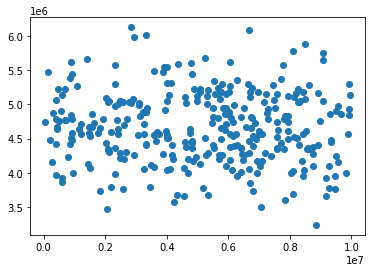

In [35]:
plt.scatter(y_test,predictions)

In [36]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

RMSE: 2798228.649336535


In [38]:
Submission_file=pd.read_csv("sample_submission.csv")
Submission_file.head()

,ID,price
0,1,5154969.998
1,2,4942067.694
2,3,5269677.121
3,4,5108408.503
4,5,4790513.736
